# Lab 4

# 0. Intro

Welcome to Lab 4! Today you'll be learning how to:

* Perform complex computations with Tables
* Define your own functions
* Plot data on a bar plot

**Run the next cell first** to set up the lab:

In [1]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# These lines load the tests.
from client.api.assignment import load_assignment 
lab04 = load_assignment('lab04.ok')

Assignment: Lab 4
OK, version v1.5.1



# 1. More fun with Tables

We'll begin today's lab by reviewing a few table functions we learned before. We'll be using [twitter_follows.csv](twitter_follows.csv), which contains data about a few Twitter accounts. If you get stuck, try referring to Lab 3, or the Tables [documentation](http://data8.org/datascience/tables.html).

**Question 1.0.** Start by importing the data in `twitter_follows.csv` into a variable named `follows`.

In [2]:
# Fill in the following line
follows = Table.read_table("twitter_follows.csv") #SOLUTION
follows

Screen name,Followers,Friends
LeoDiCaprio,1.40822e+07,142
SteveCarell,4.60758e+06,48
MarkRuffalo,2.16511e+06,1178
amyschumer,3.45233e+06,1931
TherealTaraji,3.96039e+06,702
azizansari,9.37407e+06,0
Racheldoesstuff,31996,3341
IAMQUEENLATIFAH,6.89094e+06,458


In [3]:
_ = lab04.grade('q10')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



In the table, `Followers` refers to the number of people who follow the user, and `Friends` refers to the number of people they follow.
Let's explore this data a bit to review a few table functions.

**Question 1.1.0** Calculate the smallest value in the `Friends` column and assign it to the variable `least_friends`. Try doing it without using `np.min`. This problem (and the ones after it) should be done **programmatically** (i.e. with one or more lines of code), not just by visual inspection or manual computation.

In [4]:
# Fill in the following line.
least_friends = follows.sort("Friends").column("Friends").item(0) #SOLUTION
least_friends

0

In [5]:
_ = lab04.grade('q110')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.1.1.** Now, calculate the **user** with the fewest friends and place it into the variable `why_cant_we_be_friends`.

In [6]:
# Fill in the following line.
why_cant_we_be_friends = follows.sort("Friends").column("Screen name").item(0) #SOLUTION
why_cant_we_be_friends

'azizansari'

In [7]:
_ = lab04.grade('q111')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.2.** We want to know which users are true superstars. Get a table with only the users who have more than 5 million followers.

In [8]:
# Fill in the following line.
superstars = follows.where(follows.column("Followers") > 5000000) #SOLUTION
superstars

Screen name,Followers,Friends
LeoDiCaprio,1.40822e+07,142
azizansari,9.37407e+06,0
IAMQUEENLATIFAH,6.89094e+06,458


In [9]:
_ = lab04.grade('q12')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



When working with data, we sometimes can't get all the information we're interested in from one place.
For example, with our Twitter data, we might like some other information about the users in our table, such as their gender or age.

**Question 1.3.** Import the file `twitter_info.csv` into the variable `info`.

In [10]:
# Fill in the following line.
info = Table().read_table("twitter_info.csv") #SOLUTION
info

Name,Screen name,Gender,Medium
Leonardo DiCaprio,LeoDiCaprio,M,Film
Steve Carell,SteveCarell,M,Both
Mark Ruffalo,MarkRuffalo,M,Film
Amy Schumer,amyschumer,F,Both
Taraji P. Henson,TherealTaraji,F,Both
Aziz Ansari,azizansari,M,TV
Rachel Bloom,Racheldoesstuff,F,TV
Queen Latifah,IAMQUEENLATIFAH,F,Both


In [11]:
_ = lab04.grade('q13')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Looks like we've got a more complete set of data now, but unfortunately it's split between two tables (`follows` and `info`). We'd like to join these two tables together, and for that we will use the (appropriately named) `join` function! The syntax of `join` looks like this: `t.join("Column name", r)`, where `t` and `r` are tables. The result is a new table, with the rows constructed from `t` and `r` based on common values in the column `Column name`.

**Question 1.4.** Use the `join` function to combine the tables `info` and `follows` into one table called `twitter`. Hint: think about which column is shared between the two tables.

In [12]:
# Fill in the following line.
twitter = info.join("Screen name", follows) #SOLUTION
twitter

Screen name,Name,Gender,Medium,Followers,Friends
IAMQUEENLATIFAH,Queen Latifah,F,Both,6.89094e+06,458
LeoDiCaprio,Leonardo DiCaprio,M,Film,1.40822e+07,142
MarkRuffalo,Mark Ruffalo,M,Film,2.16511e+06,1178
Racheldoesstuff,Rachel Bloom,F,TV,31996,3341
SteveCarell,Steve Carell,M,Both,4.60758e+06,48
TherealTaraji,Taraji P. Henson,F,Both,3.96039e+06,702
amyschumer,Amy Schumer,F,Both,3.45233e+06,1931
azizansari,Aziz Ansari,M,TV,9.37407e+06,0


If you're having difficulty picturing what's going on in the previous problem, here's a diagram:
<img  width=800px src="join_example.png">

In [13]:
_ = lab04.grade('q14')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Now that we have our nice combined data, we can ask some interesting questions. For example, we might be interested in the gender breakdown of our table. For this we can use the `group` function, which looks like this:

In [14]:
# Just run this cell.
twitter.group("Gender")

Gender,count
F,4
M,4


When given a column name, `group` merges together the rows with repeated values in that column, with one row in the result per unique value in that column.
For example, `group`-ing on "Gender" above gave us back two rows (one for "F" and one for "M"). When used that way, `group` simply counts the number of rows per group.

**Question 1.5.** Use `group` to find out how many of these Twitter users work on films, how many work on TV, and how many work on both. Place your result in the variable `medium_counts`.

In [15]:
# Fill in the following line.
medium_counts = twitter.group("Medium") #SOLUTION
medium_counts

Medium,count
Both,4
Film,2
TV,2


In [16]:
_ = lab04.grade("q15")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



`group` is quite useful for counting, but it can actually do more powerful computations. If you pass a function name (like `np.mean`) as a second argument to `group`, it uses that function to aggregate together the values in each column other than the grouping column. People often call the function an *aggregation function* or *aggregator*. The syntax looks like: `t.group("Column name", aggregation_function)`.

Suppose that for each medium (film, TV, or both) we'd like to know the largest number of followers and friends among all the users who work in that medium.  Here's a diagram of how it works when we use `group` to do that:
<img src="group_example.png">

You might think that the `np.max` part looks weird without parentheses. In Python, functions themselves can be treated as values and passed around. For example, we can copy a function into a variable, and then call it, as shown below (this is basically what's happening when we pass `np.max` as an argument to `group`):

In [17]:
# Just run this cell.
my_max = np.max
my_max(np.array([-1, 0, 1]))

1

Also, notice how the columns are named in the result table. `group` takes the original column names and appends the name of the function passed in. A bit unintuitively, the "name" of `np.max` is `amax`.

**Question 1.6.0** Use `group` and `np.max` to find the largest Followers and Friends values for each value of "Medium".

In [18]:
# Fill in the following line.
medium_max = twitter.group("Medium", np.max) #SOLUTION
medium_max

Medium,Screen name amax,Name amax,Gender amax,Followers amax,Friends amax
Both,,,,6.89094e+06,1931
Film,,,,1.40822e+07,1178
TV,,,,9.37407e+06,3341


You might have noticed that some of the columns are left blank. This is because taking the `max` of a text column doesn't really make sense. Nonetheless, it still looks pretty ugly.

**Question 1.6.1** Create a new table from `medium_max` with the blank columns removed. Hint: you don't need to do anything fancy - you can just specify the desired columns by name or index. Note: in practice, it's often cleaner to remove the unnecessary columns *before* you call `group`.

In [19]:
# Fill in the following line.
clean_medium_max = medium_max.select([0, 4, 5]) #SOLUTION
clean_medium_max

Medium,Followers amax,Friends amax
Both,6.89094e+06,1931
Film,1.40822e+07,1178
TV,9.37407e+06,3341


In [20]:
_ = lab04.grade('q16')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



That looks better, doesn't it?

Sometimes we're interested in examining groups that are defined by multiple variables (like all possible combinations of `Medium` and `Gender`). We can do this using the `groups` function, which works exactly like `group`, but takes a list of column names instead of a single column name. The syntax looks like this: `t.groups(["Colname 1", "Colname 2", ...], aggregation_function)`.

**Question 1.7.** Try using the `groups` and `np.mean` functions to examine the mean followers/friends of each `Gender/Medium` combination.

In [21]:
# Fill in the following line.
group_means = twitter.groups(["Gender", "Medium"], np.mean) #SOLUTION
group_means

Gender,Medium,Screen name mean,Name mean,Followers mean,Friends mean
F,Both,,,4.76789e+06,1030.33
F,TV,,,31996,3341
M,Both,,,4.60758e+06,48
M,Film,,,8.12366e+06,660
M,TV,,,9.37407e+06,0


In [22]:
_ = lab04.grade('q17')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



This gives us some interesting information, but the format isn't as nice as it could be. If we're interested in
the summary values for only a single column (like Followers or Friends), we can use the `pivot` function to give a more readable output. It looks like this:

In [23]:
# Just run this cell.
twitter.pivot("Gender", "Medium", "Followers", np.mean)

Medium,F,M
Both,4.76789e+06,4.60758e+06
Film,0,8.12366e+06
TV,31996,9.37407e+06


Here, the first two arguments are columns that we want to group by, the third is the column whose values we're interested in, and the fourth is the function which aggregates those values together for each group. Notice that the values are the same as those in the "Followers mean" column in the previous table. We sometimes call the output of this function a "pivot table" or "contingency table."

# 3. Functions

We've been using functions and methods all the time in this course, even if we didn't know it. For example, simple operations like `np.array` and `max` are examples of functions in Python. One of the most powerful tools in programming languages is the ability to define your own functions to do something custom for you.

Here's how to define a function called `DoSomething` in Python:

<img  width=500px src="func.png">

Notice, above, some key things about how to define our own functions:
* We have to start with the keyword `def`, which is short for "define."
* Next, we give the function a name.
* After this, we have a pair of parentheses. In this example they are empty, but we will see examples of the parentheses having something inside of them.
* This is followed by a colon ("`:`"), which is an important convention in Python. You will see it in more places than just when we define functions.
* Now, we notice that for the body of our function, we need to indent everything.
* We can do anything we want inside of the function body, including simple assignment statements like `value = 1`.
* Lastly, the function ends with the keyword `return`, which is the value of the function call. If no `return` is explicitly stated, then the function doesn't return anything at all. We'll see an example of this in a moment.

See an example below. 

In [24]:
# Run this cell.
def nothing():
    x = 4
    return x
nothing()

4

Notice, above, how we call the function. Just as we have seen before with built-in or imported functions, we have a set of open and closed parenthesis to signify a function call. Compare this with the next expression, where we don't call the function. Notice what Python displays.

In [25]:
# Run this cell.
nothing

<function __main__.nothing>

All it does is tell us that `nothing` is a function, which makes sense, as we never really asked it to do anything for us.  The expression in that cell isn't a function *call* expression, it's just a name expression whose value is the function we defined above.

Here is an example of a function without a return statement. Try running the cell and see what happens.

In [26]:
# Run this cell.
def returns_nothing():
    x = 2
    print(x)

abs(returns_nothing())

2


TypeError: bad operand type for abs(): 'NoneType'

Notice that an error occurred, because `abs` is not receiving any value from `returns_nothing()`, and doesn't know what to do.

**Question 3.0.** Run the cell below, and notice it doesn't do anything. Fix it such that the function `eight` returns `8`.

In [27]:
# Fill in the return line in the function.
def eight():
    x = 8
    return x #SOLUTION
eight()

8

In [ ]:
_ = lab04.grade('q30')

## 3.0. Arguments to functions
It's great that we have defined a few simple functions, but you've probably noticed that these functions don't take any arguments, unlike most of the built-in or imported functions we've seen.  As a result, our functions have always done exactly the same thing every time we've called them, because we couldn't pass them any information. (Every time we write `eight()`, that expression has the value `8`. That's cute but pretty useless.) Let's see how to write more useful functions.

To give a function arguments, put a list of names inside the parentheses in its definition, mimicking the way you'd pass arguments when calling the function. Check out the example below.

In [28]:
# Run this cell.
def addition(x,y):
    return x + y
addition(4,5)

9

When you say `def addition(x,y)`, you're saying: "every time you call `addition`, the first argument will get the name `x` while the code inside this function is running, and the second argument will get the name `y` while the code inside this function is running." So the names `x` and `y` in the line `def addition(x,y)` didn't already have values, and they don't have values outside the function definition. (You can test that by writing `x` or `y` after the last line in the previous cell.) 

We passed in `4` for `x`, and `5` for `y`. Hence, when we ask for the value of `addition(4,5)`, the function returns `9`.

An important thing to know, however, is that Python doesn't check to make sure our arguments make sense.

In [29]:
# Run this cell.
addition(4, 'a string')

TypeError: unsupported operand type(s) for +: 'int' and 'str'

If someone passes in arguments a function isn't designed to deal with, then errors often occur, in exactly the same way that errors occur when values are misused in other kinds of code.  (Just writing `4 + 'a string'` causes the same error you get when you run the cell above.)

**Question 3.0.0.** Fill in the implementation of `five_times`, which takes in three arguments and returns 5 times the sum of the arguments. 

In [30]:
# Fill in the function's body.
def five_times(x, y, z):
    return 5 * (x + y + z) #SOLUTION
five_times(2,3,5)

50

In [ ]:
_ = lab04.grade('q300')

**Question 3.0.1.** Define a function below from scratch, which takes two numerical arguments and returns a boolean value indicating whether or not the first argument is greater than the second argument. Call the function `is_greater`.

In [31]:
# Define the is_greater function.
def is_greater(x, y): #SOLUTION
    return x > y

In [ ]:
_ = lab04.grade('q301')

## 3.1 Print
Sometimes, however, we just want our functions to carry out some operations and give us feedback, without computing a specific value. For this, Python has the `print` function. See it in action below.

In [32]:
# Run this cell.
def just_print(x):
    print(x)
    return 5
value = just_print("Hello Word")

Hello Word


Notice some things here. First of all, the print statement ran and printed a value even though all we did was an assignment statement. (Recall that the value of the last line of a cell is normally printed, but an assignment statement has no value, so normally nothing would be printed.) What, however, is the value of the variable `value`?

In [ ]:
# Run this cell.
value

This illustrates that `return` and `print` are completely different things. Return defines what the value of a function call is, and print just shows us stuff. So, what would be the value of `x` if we wrote `x = print('Hello')`?

In [ ]:
# Run this cell.
x = print('Hello')
x

We see that `Hello` is printed, but nothing shows up when we ask for the value of `x`. In a sense, `x` doesn't have any value at all (since the `print` function doesn't return anything).

**Question 3.1.0** Fill in the implementation of the function `print_and_return` which prints out the sentence given to it *and* returns the number of letters in the sentence.

In [ ]:
# Fill in the function's body.
def print_and_return(sentence):
    print(sentence) #SOLUTION
    return len(sentence) #SOLUTION
print_and_return("The GSIs of Data 8 are the best!")

In [ ]:
_ = lab04.grade('q310')

## 3.2. If Statements

`if` statements, or *conditional* statements, are another important tool.  They let us execute different code depending on whether different things are true.  Here's an example:

<img src="rsz_1if-statement.jpg" width=500px>

The 9 lines of code in this example constitute a single `if` statement with 3 blocks.  In an `if` statement, Python checks each block in the order written.

* If it sees `if <some expression>:` (for the first block in an `if` statement) or `elif <some expression>:` (for subsequent blocks), it computes the value of the expression after it, like `a > b` and `a < b` in this example.  That expression should have a boolean value, and it's usually called a *test* expression or *condition* expression.  If it's `True`, the code between that case and the next (called the `body`, which needs to all be indented by the same number of spaces) is executed, and then Python finishes the statement.  Otherwise, it moves to the next block.

* `else:` works just like `elif True:` -- if Python gets to an `else` block, it always executes its body and finishes the statement.  You don't always have to include an `else` block, but if you do, it should be the last block, because blocks after it couldn't ever be executed.  (In fact, Python will complain to you if you try to add `elif` blocks after an `else` block.)

Now that we have gotten through the syntax, let's see an example below. 

In [ ]:
# Run this cell.
def only_if_five(x):
    if x == 5:
        return True
    else:
        return False
only_if_five(6)

Since `x` was 6 in this case, which isn't equal to 5, Python moved on to the next block, which ran and caused the function to return `False`. Python goes from top to bottom and runs all the test expressions until the first test expression is true. For example: 

In [ ]:
# Run this cell.
def many_true(num):
    if num == 5:
        x = 5
    elif num - 5 == 0:
        x = 7
    else:
        x = 8
    return x
many_true(5)

So, we see that both the `if`'s and the `elif`'s test expressions are true, but only the first one's body was executed. Again, Python keeps checking until the first test is true, executes that block's body, then leaves the whole `if` statement and does whatever's next (in this case, `return x`).

## 3.3. Define your own. 
Now follows a list of a few questions, all asking you to combine your knowledge from above in order to define your own functions. 

**Question 3.3.0.**  Implement the function `is_strictly_increasing` which takes in an array of three elements and returns whether the array is strictly increasing, that is, the first element is smaller than the second element, which is smaller than the third element. 


In [ ]:
# Fill in the function's body.
def is_strictly_increasing(arr):
    if arr.item(0) < arr.item(1) and arr.item(1) < arr.item(2): #SOLUTION
        return True #SOLUTION
    else: #SOLUTION
        return False #SOLUTION
is_strictly_increasing(np.array([1,2,3]))

In [ ]:
_ = lab04.grade('q330')

**Question 3.3.1.** Implement the following function, `fizzbuzz`, which takes in a number and returns 'fizz' if it divisible by 3, 'buzz' if it is divisible by 5, or 'fizzbuzz' if it is divisible by both. If it is not divisible by any of these, simply return the string representation of the number.

You'll want to use the `%` operator (called the *remainder* operator, or sometimes the *modulus* operator).  `a % b` is an expression whose value is the remainder when dividing `a` by `b`. For example, `5 % 2` is 1, as there is a remainder of 1 when dividing `5 by 2`.

*Hint:* To check if `x` is evenly divisible by `y`, you can write `x % y == 0`.  (This is a common idiom in programming.)

In [ ]:
# Fill in the function's body.
def fizzbuzz(num):
    if num % 15 == 0: #SOLUTION
        return 'fizzbuzz' #SOLUTION
    elif num % 3 == 0: #SOLUTION
        return 'fizz' #SOLUTION
    elif num % 5 == 0: #SOLUTION
        return 'buzz' #SOLUTION
    else: #SOLUTION
        return str(num) #SOLUTION

# The following code tries out every number up to 15 for you.  You'll learn how to write code like this soon.
for x in range(1, 16):
    print(fizzbuzz(x))

In [ ]:
_ = lab04.grade('q331')

**Question 3.3.2.** Implement the function `most_followers`, which takes as a single argument a table formatted like `follows` (from your Twitter dataset investigations), and returns the screen name of the person with the most followers.

In [ ]:
# Fill in the function's body.
def most_followers(tbl):
    return tbl.sort("Followers").column("Screen name").item(-1) #SOLUTION
most_followers(follows)

In [ ]:
_ = lab04.grade('q332')

## 3.4. `apply`

Now that we have the ability to write functions, we can perform powerful computations with Tables. Returning to our Twitter data, we might be interested in computing a user's total "connections" as the sum of their followers and friends. We'll use the `apply` function, which works like this: `t.apply(fn, ["Column1", "Column2", ...])`. Given a function `fn`, `apply` calls that function on every row of the table, passing in values from each specified column. Here's an example:
<img src="apply_example.png">


In the above diagram, notice how `addition` gets called once for every row of the table. It takes two arguments, which is why we needed to specify two column names.

**Question 3.4.0.** Let's code it up! Using `apply` and your `addition` function from earlier, compute each user's total connections. The result should be an array of length eight.

**Important:** The results should be sorted by screen name according to the order Python sorts strings.  Upper-case letters all come before lower-case letters, so IAMQUEENLATIFAH's total connections should be first, and azizansari's should be last.  You can do this with a short call to the `sort` method.

In [ ]:
# Fill in the following line.
connections = twitter.sort("Screen name").apply(addition, ["Followers", "Friends"]) #SOLUTION
connections

In [ ]:
_ = lab04.grade('q340')

# 4. Plotting 
To finish off this lab, we will begin our introduction to plotting. You've probably seen various kinds of plots before, in school or elsewhere. Some very common ones are bar plots and histograms. Plots are very useful for data science, because they're a very clear and informative way to investigate data.

Today, we'll see how to use bar plots to plot categorical data.

# 4.0 Bar Charts
Bar charts have two axes, with the `y` axis showing several categories, and the `x` axis showing the amount of "stuff" associated with each category. Often, the `x` axis variable represents some kind of count, like the number of things in the category, but it can be any numerical value. To see this in action, let's convert the `follows` table into a two column table with columns `Screen name` and `Friends`.

In [33]:
# Fill in the following line
follows1 = follows.select([0, 2]) #SOLUTION
follows1

Screen name,Friends
LeoDiCaprio,142
SteveCarell,48
MarkRuffalo,1178
amyschumer,1931
TherealTaraji,702
azizansari,0
Racheldoesstuff,3341
IAMQUEENLATIFAH,458


Now, let's make a bar plot about the number of friends each Twitter user has. We use the Table method `.barh`, and its argument is the category which we would like on the `y` axis. For example:

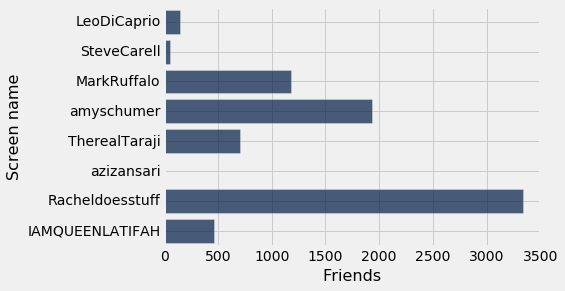

In [34]:
tableA = follows1.barh('Screen name')
tableA

Pretty cool, huh? But, we have to be careful. Let's sort the data and see how the bar graph looks now. 

In [ ]:
follows2 = follows1.sort('Friends')
tableB = follows2.barh('Screen name')
tableB

At first glance, these plots look quite different. But, if we look more closely, we see that the data being plotted is the same, but is just displayed in a different order.

What's great about both of these plots, but the second in particular, is that they make it very easy to learn a lot about our data. It's very easy to pick out who has the most and least friends on Twitter, and to see how spread out the data is. This would be much harder to figure out if we were looking at a table of data (especially if the data was much larger than ours). Many useful insights in data science can be had without performing a single "statistical" procedure, simply by looking at a graph of the data. Your brain is really good at getting information from pictures.

**Question 4.0.0.** Create a function called `plotter` that takes in a two column list and a column label and creates a bar plot with the column `label` as the categorical (`y`-axis) variable.  It shouldn't return anything.

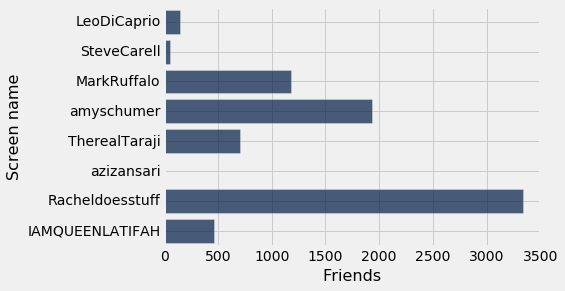

In [35]:
# Fill in the function's body.
def plotter(tbl, label):
    tbl.barh(label) #SOLUTION
plotter(follows1, 'Screen name')

Make sure your plot looks the same as the first one we created.

In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [lab04.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]

In [ ]:
# Run this cell to submit your work *after* you have passed all of the test cells.
# It's ok to run this cell multiple times. Only your final submission will be scored.

!TZ=America/Los_Angeles ipython nbconvert --output=".lab04_$(date +%m%d_%H%M)_submission.html" lab04.ipynb && echo "Submitted Successfully"